In [1]:
import numpy as np
import codecs
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as skl
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from skimpy import skim
from google.colab import files

In [2]:
!pip install skimpy


In [3]:
#imports packages to be used in the code
from skimpy import skim


In [ ]:
categorical_columns = []
for col in categorical_columns:
    df[col] = df[col].astype('category')

# New Section

In [ ]:
# shows first 6 rows of dataframe
df.head(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0


In [ ]:
df.tail(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
9510,1,70,4.39,662,3.00,6,0
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0
9515,1,853,4.89,732,37.88,6,0


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9516   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default        │   0 │      0 │    0.1598 │   0.3665 │      0 │      0 │      0 │      0 │     1 │ █    ▂  │  │
│ │ installment    │   0 │      0 │     320.1 │    207.1 │     16 │    164 │  269.5 │  435.2 │   940 │ ▇█▅▃▂▁  │  │
│ │ log_income     │   0 │      0 │     4.749 │    0.265 │   3.28 │   4.59 │   4.75 │    4.9 │  6.31 │   ▁█▆   │  │
│ │ fico_score     │   0 │      0 │     710.8 │    37.96 │    612 │    682 │    707 │    737 │   827 │ ▁▆█▅▃▁  │  │
│ │ rev_balance    │   0 │      0 │     16.99 │    33.72 │      0 │   3.27 │   8.69 │  18.36 │  1207 │    █    │  │
│ │ inquiries      │   0 │      0 │     1.573 │      2.2 │      0 │      0 │      1 │      2 │    33 │    █    │  │
│ │ records        │   0 │      0 │   0.06221 │   0.2624 │      0 │      0 │      0 │      0 │     5 │    █    │  │
│ └────────────────┴─────┴────────┴───────────┴──────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516 entries, 0 to 9515
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   default      9516 non-null   int64  
 1   installment  9516 non-null   int64  
 2   log_income   9516 non-null   float64
 3   fico_score   9516 non-null   int64  
 4   rev_balance  9516 non-null   float64
 5   inquiries    9516 non-null   int64  
 6   records      9516 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 520.5 KB


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9516   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default        │   0 │      0 │    0.1598 │   0.3665 │      0 │      0 │      0 │      0 │     1 │ █    ▂  │  │
│ │ installment    │   0 │      0 │     320.1 │    207.1 │     16 │    164 │  269.5 │  435.2 │   940 │ ▇█▅▃▂▁  │  │
│ │ log_income     │   0 │      0 │     4.749 │    0.265 │   3.28 │   4.59 │   4.75 │    4.9 │  6.31 │   ▁█▆   │  │
│ │ fico_score     │   0 │      0 │     710.8 │    37.96 │    612 │    682 │    707 │    737 │   827 │ ▁▆█▅▃▁  │  │
│ │ rev_balance    │   0 │      0 │     16.99 │    33.72 │      0 │   3.27 │   8.69 │  18.36 │  1207 │    █    │  │
│ │ inquiries      │   0 │      0 │     1.573 │      2.2 │      0 │      0 │      1 │      2 │    33 │    █    │  │
│ │ records        │   0 │      0 │   0.06221 │   0.2624 │      0 │      0 │      0 │      0 │     5 │    █    │  │
│ └────────────────┴─────┴────────┴───────────┴──────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
skim(df[df['default']==0].reset_index(drop=True))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7995   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0     ┃ p25    ┃ p50   ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │   0 │      0 │         0 │        0 │      0 │      0 │     0 │      0 │     0 │     █   │  │
│ │ installment     │   0 │      0 │     315.5 │    203.4 │     16 │    163 │   268 │  425.5 │   940 │ ▇█▅▃▂▁  │  │
│ │ log_income      │   0 │      0 │     4.752 │   0.2607 │   3.28 │    4.6 │  4.75 │   4.91 │  6.31 │    █▆   │  │
│ │ fico_score      │   0 │      0 │     713.3 │    38.21 │    612 │    682 │   707 │    742 │   827 │  ▆█▆▃▁  │  │
│ │ rev_balance     │   0 │      0 │     16.18 │    29.54 │      0 │   3.25 │  8.63 │     18 │   952 │    █    │  │
│ │ inquiries       │   0 │      0 │     1.428 │    1.997 │      0 │      0 │     1 │      2 │    31 │    █    │  │
│ │ records         │   0 │      0 │   0.05654 │   0.2556 │      0 │      0 │     0 │      0 │     5 │    █    │  │
│ └─────────────────┴─────┴────────┴───────────┴──────────┴────────┴────────┴───────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
skim(df[df['default']==1].reset_index(drop=True))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1521   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA   ┃ NA %   ┃ mean       ┃ sd       ┃ p0    ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │    0 │      0 │          1 │        0 │     1 │      1 │     1 │     1 │     1 │     █   │  │
│ │ installment     │    0 │      0 │      344.3 │    224.1 │    16 │    169 │   290 │   492 │   927 │ ▆█▅▃▂▂  │  │
│ │ log_income      │    0 │      0 │      4.731 │   0.2863 │   3.3 │   4.56 │  4.73 │   4.9 │  5.85 │    ▄█▂  │  │
│ │ fico_score      │    0 │      0 │      697.9 │    33.76 │   617 │    672 │   692 │   717 │   822 │  ▁██▄▁  │  │
│ │ rev_balance     │    0 │      0 │      21.23 │    50.07 │     0 │    3.4 │  8.94 │  20.7 │  1207 │    █    │  │
│ │ inquiries       │    0 │      0 │      2.334 │    2.938 │     0 │      0 │     1 │     3 │    33 │   █▁    │  │
│ │ records         │    0 │      0 │    0.09204 │   0.2937 │     0 │      0 │     0 │     0 │     2 │  █  ▁   │  │
│ └─────────────────┴──────┴────────┴────────────┴──────────┴───────┴────────┴───────┴───────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## **Logistic Regression in Python**

Lets begin by splitting the data into a training set (on which we will train our model) and a test sert (on which we will evaulate it).

Lets skim the train and test data. You will notice -- as we hope -- that the two datasets have very similar statistics

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
skim(df_train)
skim(df_test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6661   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA  ┃ NA %   ┃ mean       ┃ sd       ┃ p0     ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │   0 │      0 │     0.1636 │     0.37 │      0 │      0 │     0 │     0 │     1 │ █    ▂  │  │
│ │ installment     │   0 │      0 │      320.9 │    206.8 │     16 │    165 │   272 │   438 │   927 │ ▇█▅▃▂▁  │  │
│ │ log_income      │   0 │      0 │       4.75 │   0.2662 │   3.28 │   4.59 │  4.75 │  4.91 │  6.31 │   ▁█▆   │  │
│ │ fico_score      │   0 │      0 │      710.6 │     38.2 │    612 │    682 │   707 │   737 │   827 │ ▁▆█▅▃▁  │  │
│ │ rev_balance     │   0 │      0 │      17.73 │    36.36 │      0 │   3.32 │  8.76 │  18.7 │  1207 │    █    │  │
│ │ inquiries       │   0 │      0 │      1.576 │    2.209 │      0 │      0 │     1 │     2 │    33 │    █    │  │
│ │ records         │   0 │      0 │    0.06155 │   0.2567 │      0 │      0 │     0 │     0 │     5 │    █    │  │
│ └─────────────────┴─────┴────────┴────────────┴──────────┴────────┴────────┴───────┴───────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2855   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0     ┃ p25    ┃ p50   ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ default        │   0 │      0 │     0.151 │   0.3581 │      0 │      0 │     0 │      0 │      1 │ █    ▁  │  │
│ │ installment    │   0 │      0 │     318.3 │    207.7 │     16 │    163 │   266 │    431 │    940 │ ▇█▅▃▂▁  │  │
│ │ log_income     │   0 │      0 │     4.744 │   0.2622 │   3.54 │   4.59 │  4.74 │    4.9 │   5.95 │   ▁██▁  │  │
│ │ fico_score     │   0 │      0 │     711.3 │    37.38 │    632 │    682 │   707 │    737 │    822 │ ▂█▇▆▃▁  │  │
│ │ rev_balance    │   0 │      0 │     15.27 │     26.5 │      0 │  3.165 │   8.5 │  17.54 │  602.5 │    █    │  │
│ │ inquiries      │   0 │      0 │     1.565 │    2.181 │      0 │      0 │     1 │      2 │     32 │    █    │  │
│ │ records        │   0 │      0 │   0.06375 │   0.2754 │      0 │      0 │     0 │      0 │      4 │    █    │  │
│ └────────────────┴─────┴────────┴───────────┴──────────┴────────┴────────┴───────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### ** Generate / Fit Model**

In [ ]:
print(df.columns)

Index(['default', 'installment', 'log_income', 'fico_score', 'rev_balance',
       'inquiries', 'records'],
      dtype='object')


In [ ]:
'''
The logistic regression results provide insights into the relationships between the dependent variable (transferred) and the
independent variable (First GPA).

'''

# build formula,
# formula="Transferred ~ Gender + Race + Ethnicity + Age + FirstGen + FirstGPA"
# formula="Transferred ~ Gender + Ethnicity + Age + FirstGen + FirstGPA"
# formula="Transferred ~ Gender + Ethnicity + FirstGen + FirstGPA"
# formula="Transferred ~ Ethnicity + FirstGen + FirstGPA"
# formula="Transferred ~ Ethnicity + FirstGPA"
formula="default ~ installment + log_income + fico_score + rev_balance + inquiries + records"

# build model, fit the formula to the training data using a logistic algorithim (logit)
est = logit(formula=formula, data=df_train).fit()

# print the results of the model (est).
# Examine; Pseudo R-squared, p values, coefficients
print(est.summary())

Optimization terminated successfully.
         Current function value: 0.422497
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6654
Method:                           MLE   Df Model:                            6
Date:                Fri, 04 Jul 2025   Pseudo R-squ.:                 0.05197
Time:                        03:45:10   Log-Likelihood:                -2814.3
converged:                       True   LL-Null:                       -2968.5
Covariance Type:            nonrobust   LLR p-value:                 1.221e-63
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.8663      0.971      9.128      0.000       6.963      10.770
installment     0.0011    

In [ ]:
'''
Each row represents an observation in the test data, and the predicted_probability column shows the model's
estimated probability of default for each observation.

the model's predicted probability of default (predicted_probability).
'''

# apply the model (est) to the test data and make predictions
preds = est.predict(df_test)
df_test['predicted_probability'] = preds

# print top 6 predicted probabilities
df_test.head(10)


,default,installment,log_income,fico_score,rev_balance,inquiries,records,predicted_probability
0,0,256,5.04,792,2.37,0,0,0.040833
1,0,281,5.15,697,7.48,2,0,0.116758
2,0,199,4.65,702,13.03,0,0,0.125638
3,0,294,4.45,742,11.68,2,0,0.143444
4,0,247,4.56,672,3.72,0,0,0.174712
5,0,149,4.50,782,0.02,0,0,0.063064
6,0,639,4.81,722,15.92,0,0,0.146464
7,0,190,5.04,742,5.12,2,0,0.077531
8,0,80,4.34,707,3.23,3,0,0.182223
9,0,384,5.18,767,61.92,0,0,0.067615


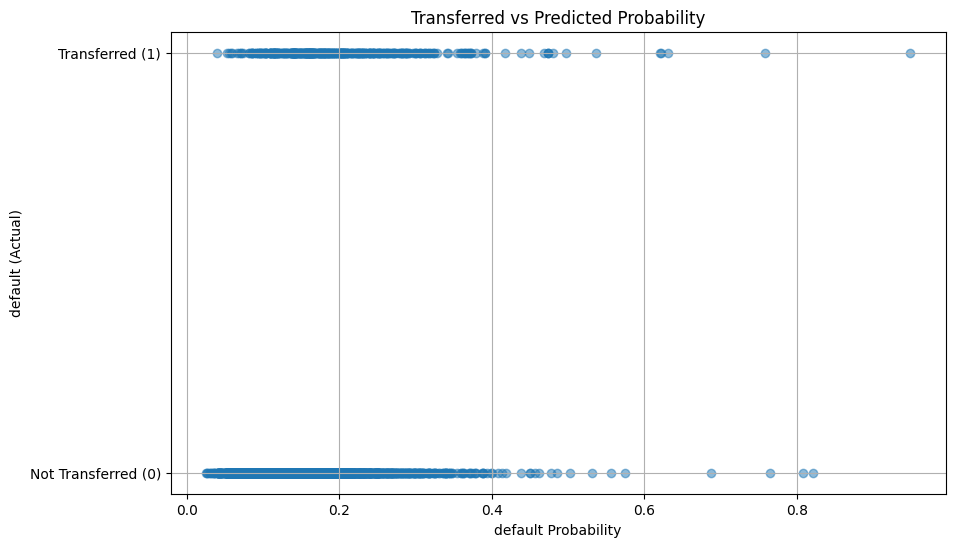

In [ ]:
# prompt: plot Transferred vs predicted_probability

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df_test['predicted_probability'],df_test['default'],alpha=0.5)
plt.ylabel('default (Actual)')
plt.xlabel('default Probability')
plt.title('Transferred vs Predicted Probability')
plt.yticks([0, 1], ['Not Transferred (0)', 'Transferred (1)'])
plt.grid(True)
plt.show()

In [ ]:
'''
I have added the 'will_transfer' column to the DataFrame,
indicating whether the predicted probability of transfer is greater than 0.5.

'''
# test for 'predicted_probability > 0.5, if yes assign will_default to 1, otherwise to 0
df_test['will_transfer'] = np.where(df_test['predicted_probability']>0.5, 1, 0)
df_test.head(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records,predicted_probability,will_transfer
0,0,256,5.04,792,2.37,0,0,0.040833,0
1,0,281,5.15,697,7.48,2,0,0.116758,0
2,0,199,4.65,702,13.03,0,0,0.125638,0
3,0,294,4.45,742,11.68,2,0,0.143444,0
4,0,247,4.56,672,3.72,0,0,0.174712,0
5,0,149,4.50,782,0.02,0,0,0.063064,0


In [ ]:
true_pos = ((df_test['default'] == 1) & (df_test['will_transfer'] == 1)).sum()
false_pos = ((df_test['default'] == 0) & (df_test['will_transfer'] == 1)).sum()
false_neg = ((df_test['default'] == 1) & (df_test['will_transfer'] == 0)).sum()
true_neg = ((df_test['default'] == 0) & (df_test['will_transfer'] == 0)).sum()

total = true_pos + false_pos + false_neg + true_neg

print(true_pos, false_pos, false_neg, true_neg)

acc_rate = (true_pos + true_neg) / total # the probability the model correctly categorizes a data point
error_rate = (false_pos + false_neg) / total # the probability the model incorrectly categorizes a data point

true_pos_rate = true_pos / (true_pos + false_neg) # the probability the model correctly categorizes a data point given it's positive
false_pos_rate = false_pos / (true_neg + false_pos) # the probability the model incorrectly categorizes a data point given it's negative

print(f'{100.0*acc_rate:.3f}%', f'{100.0*error_rate:.3f}%')
print(f'{100.0*true_pos_rate:.3f}%', f'{100.0*false_pos_rate:.3f}%')

6 8 425 2416
84.834% 15.166%
1.392% 0.330%


### **Evaluate Model**

Accuracy:0.8483362521891419


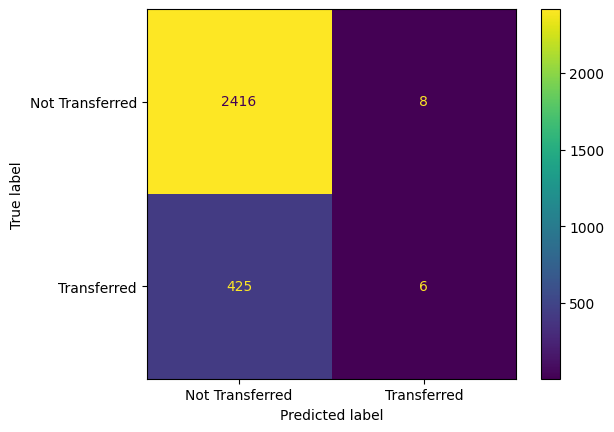

In [ ]:
# Evaluation Metrics
# print confusion matrix with labels

ConfusionMatrixDisplay.from_predictions(df_test['default'], df_test['will_transfer'], display_labels = ['Not Transferred', 'Transferred'])
# print accuracy
print('Accuracy:'+str(accuracy_score(df_test['default'], df_test['will_transfer'])))

In [ ]:
cm = confusion_matrix(df_test['default'], df_test['will_transfer'])
cm_baseline = ((cm[0,0]+cm[0,1])*1000)-((cm[1,0]+cm[1,1])*5000)

print(cm[0,0])
print(cm[0,1])

print(cm[1,0])
print(cm[1,1])

print(cm_baseline)


2416
8
425
6
269000


In [ ]:
df.head(6)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
5,0,125,5.17,727,50.81,0,0
